In [1]:
import pandas as pd


In [12]:
import json
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import string
from textblob import TextBlob

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from pandas import read_excel

In [15]:
df=pd.read_excel('test4.xlsx')

In [16]:
df.head()

,Code,Message
0,1,I have classes
1,1,it was nice seeing u too
2,1,hectic right
3,1,lol
4,1,too much studying


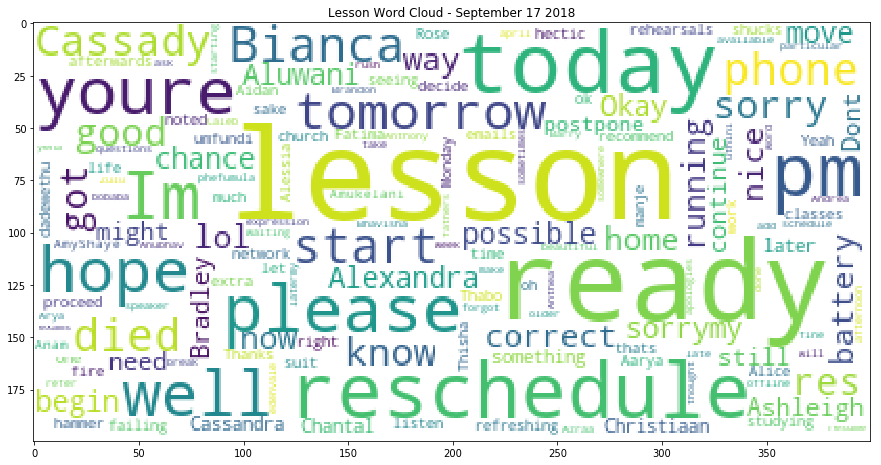

In [18]:
# Creat a stopword list
stopwords = list(STOPWORDS) + list(string.punctuation) + ["http", "https", "RT"]

# generate text
strings = ''
for text in df['Message']:
    strings += text

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=60
                      , background_color="white"
                      , stopwords=stopwords
                      , collocations=False
                     ).generate_from_text(strings)

# Display the generated image with matplotlib 
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.title('Lesson Word Cloud - September 17 2018')
plt.axis("on")
plt.savefig("wordcloud.png")
plt.show()

In [19]:
def sentimentEvaluation(t):
   
    blob = TextBlob(t)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return "positive"
    elif sentiment < 0:
        return "negative"
    else:
        return "neutral"

In [22]:
df['sentiment'] = df['Message'].map(lambda tx: sentimentEvaluation(tx))
df['sentiment'][:10]

0     neutral
1    positive
2    positive
3    positive
4    positive
5    positive
6     neutral
7     neutral
8     neutral
9     neutral
Name: sentiment, dtype: object

In [23]:
senti_sum = df.sentiment.value_counts()
senti_sum

neutral     108
positive     50
negative      5
Name: sentiment, dtype: int64

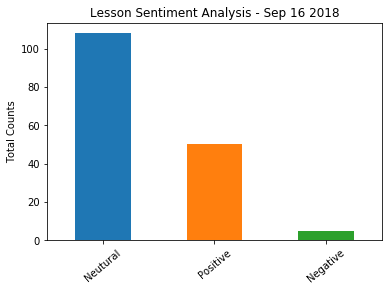

In [24]:
#fig = plt.figure(figsize=(6,4))
senti_sum.plot(kind='bar')

plt.title('Lesson Sentiment Analysis - Sep 16 2018')
plt.ylabel('Total Counts')
plt.xticks(range(3), ('Neutural', 'Positive', 'Negative'), rotation=40)
plt.savefig("sentiment.png")
plt.show()